In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("NYC_Collisions.csv")

In [9]:
df.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,NaN,40.83398,-73.826350,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,NaN,40.68730,-73.973656,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,NaN,NaN,NaN,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.88270,-73.892730,NaN,Not Reported,0.0,0,0,0,0,0,0,0
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.978640,Unspecified,Passenger Vehicle,0.0,0,0,0,0,0,0,0


In [11]:
df.shape

(238421, 18)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238421 entries, 0 to 238420
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Collision ID         238421 non-null  int64  
 1   Date                 238421 non-null  object 
 2   Time                 238421 non-null  object 
 3   Borough              231224 non-null  object 
 4   Street Name          238058 non-null  object 
 5   Cross Street         111291 non-null  object 
 6   Latitude             216098 non-null  float64
 7   Longitude            216098 non-null  float64
 8   Contributing Factor  237134 non-null  object 
 9   Vehicle Type         238421 non-null  object 
 10  Persons Injured      238420 non-null  float64
 11  Persons Killed       238421 non-null  int64  
 12  Pedestrians Injured  238421 non-null  int64  
 13  Pedestrians Killed   238421 non-null  int64  
 14  Cyclists Injured     238421 non-null  int64  
 15  Cyclists Killed  

In [15]:
df.isna().sum()

Collision ID                0
Date                        0
Time                        0
Borough                  7197
Street Name               363
Cross Street           127130
Latitude                22323
Longitude               22323
Contributing Factor      1287
Vehicle Type                0
Persons Injured             1
Persons Killed              0
Pedestrians Injured         0
Pedestrians Killed          0
Cyclists Injured            0
Cyclists Killed             0
Motorists Injured           0
Motorists Killed            0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [21]:
df["Time"]=pd.to_datetime(df["Time"], format="%H:%M:%S")
df["Date"]=pd.to_datetime(df["Date"])                    

In [23]:
df["Borough"].value_counts()

Borough
Brooklyn         76416
Queens           63751
Bronx            41255
Manhattan        38234
Staten Island    11568
Name: count, dtype: int64

In [26]:
df["Borough"].fillna("Unspecified", inplace=True)
df["Street Name"].fillna("N/A", inplace=True)
df["Persons Injured"].fillna(1, inplace=True)
df[["Latitude","Longitude"]]=df[["Latitude","Longitude"]].fillna("N/A")
df["Cross Street"].fillna("Unspecified", inplace=True)

C:\Users\ricmm\AppData\Local\Temp\ipykernel_13540\3440858239.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Borough"].fillna("Unspecified", inplace=True)
C:\Users\ricmm\AppData\Local\Temp\ipykernel_13540\3440858239.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [28]:
df["Contributing Factor"].value_counts()

Contributing Factor
Driver Inattention/Distraction                           58308
Unspecified                                              58262
Failure to Yield Right-of-Way                            16555
Following Too Closely                                    15519
Passing or Lane Usage Improper                           10733
Passing Too Closely                                       9132
Unsafe Speed                                              8429
Backing Unsafely                                          7473
Traffic Control Disregarded                               6717
Other Vehicular                                           6494
Turning Improperly                                        5384
Unsafe Lane Changing                                      4973
Driver Inexperience                                       4551
Alcohol Involvement                                       3952
Reaction to Uninvolved Vehicle                            3165
Pedestrian/Bicyclist/Other Pedestri

In [30]:
df["Contributing Factor"].fillna("Unspecified", inplace=True)

C:\Users\ricmm\AppData\Local\Temp\ipykernel_13540\81295373.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Contributing Factor"].fillna("Unspecified", inplace=True)


In [32]:
df["Contributing Factor"].replace("Unspecified", "Multiple/Uncertain Factor", inplace=True)

In [34]:
df.isna().sum()   ## null values cleaned

Collision ID           0
Date                   0
Time                   0
Borough                0
Street Name            0
Cross Street           0
Latitude               0
Longitude              0
Contributing Factor    0
Vehicle Type           0
Persons Injured        0
Persons Killed         0
Pedestrians Injured    0
Pedestrians Killed     0
Cyclists Injured       0
Cyclists Killed        0
Motorists Injured      0
Motorists Killed       0
dtype: int64

In [36]:
from datetime import datetime
df["Month"]=df["Date"].dt.month

In [38]:
month_label={
    1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"June",
    7:"July", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"
}

df["Month"]=df["Month"].map(month_label)

In [40]:
df["Year"]=df["Date"].dt.year

In [42]:
df["Hour"]=df["Time"].dt.hour

In [100]:
df["Day-Night"]=pd.cut(df["Hour"], 
                       bins=[0,4,11,15,19,23],
                       labels=["Late Night","Morning","Afternoon","Evening","Night"])

In [102]:
df["Weekday"]=df["Date"].dt.day_name()

In [104]:
df["Time"]=df["Time"].dt.time

AttributeError: Can only use .dt accessor with datetimelike values

In [156]:
df.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,Month,Year,Hour,Day-Night,Weekday
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,Unspecified,40.83398,-73.82635,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0,Jan,2021,20,Night,Friday
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,Unspecified,40.6873,-73.973656,Multiple/Uncertain Factor,Passenger Vehicle,0.0,0,0,0,0,0,0,0,Jan,2021,5,Morning,Friday
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,Unspecified,N/A,N/A,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0,Jan,2021,6,Morning,Friday
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.8827,-73.89273,Multiple/Uncertain Factor,Not Reported,0.0,0,0,0,0,0,0,0,Jan,2021,19,Evening,Friday
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.97864,Multiple/Uncertain Factor,Passenger Vehicle,0.0,0,0,0,0,0,0,0,Jan,2021,7,Morning,Friday


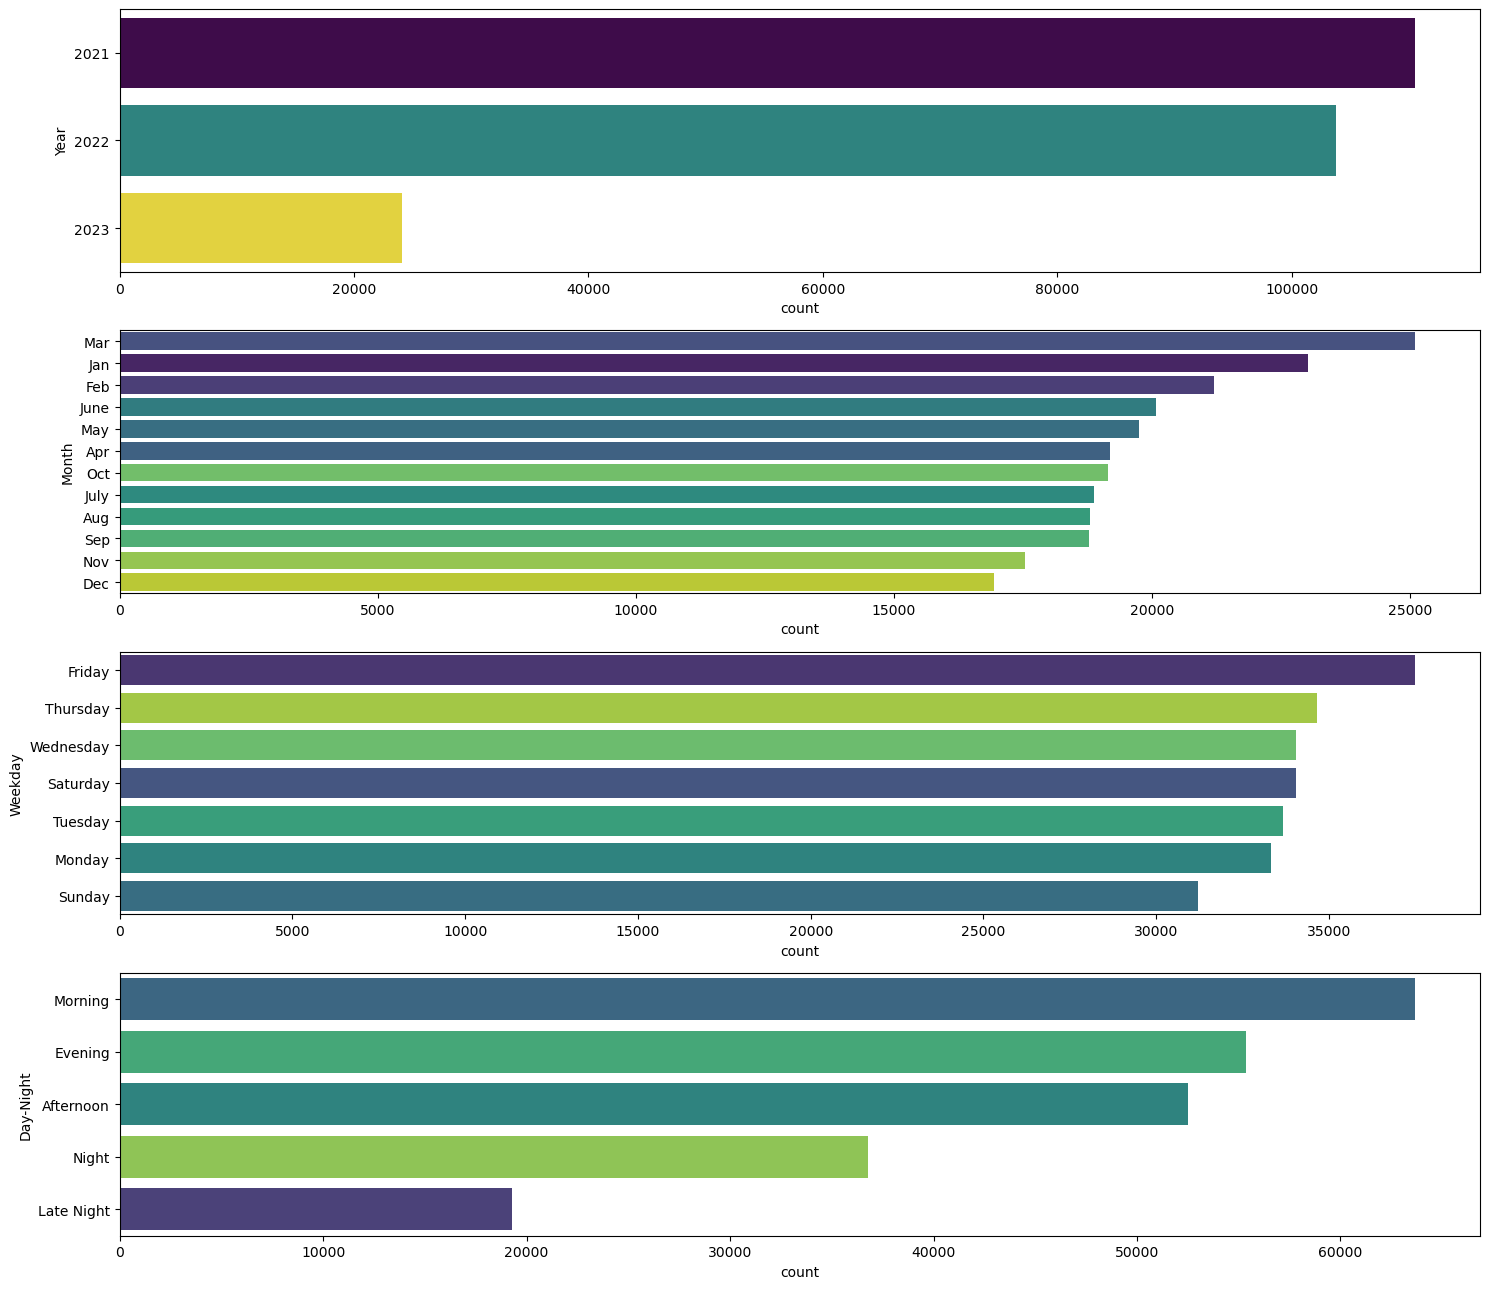

In [158]:
plot1=["Year","Month","Weekday","Day-Night"]
plt.figure(figsize=(15,13))

for i, col in enumerate(plot1, 1):
    plt.subplot(4,1,i)
    sns.countplot(y=df[col], order=df[col].value_counts().index, hue=df[col], legend=False, palette="viridis")

plt.tight_layout()

In [108]:
heatmap_data1=df.pivot_table(index="Weekday", columns="Day-Night", aggfunc="size")
heatmap_data1

C:\Users\ricmm\AppData\Local\Temp\ipykernel_13540\2429035495.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data1=df.pivot_table(index="Weekday", columns="Day-Night", aggfunc="size")


Day-Night,Late Night,Morning,Afternoon,Evening,Night
Weekday,,,,,
Friday,2356,9893,8455,9019,6241
Monday,2354,9937,7433,7706,4408
Saturday,4600,7415,6819,7056,6264
Sunday,4954,6430,6060,6440,5282
Thursday,1848,9984,7879,8512,5076
Tuesday,1504,10079,7911,8255,4671
Wednesday,1688,9935,7963,8380,4856


In [110]:
heatmap_data2=df.pivot_table(index="Month", columns="Day-Night", aggfunc="size")
heatmap_data2

C:\Users\ricmm\AppData\Local\Temp\ipykernel_13540\2747132589.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data2=df.pivot_table(index="Month", columns="Day-Night", aggfunc="size")


Day-Night,Late Night,Morning,Afternoon,Evening,Night
Month,,,,,
Apr,1507,4879,4338,4459,3077
Aug,1630,4746,4181,4266,3115
Dec,1455,4437,3579,4070,2663
Feb,1624,5820,4832,4836,3091
Jan,1769,6489,5049,5295,3465
July,1721,4676,4175,4387,3024
June,1633,5110,4479,4916,3033
Mar,1804,7019,5553,5780,3878
May,1619,4972,4364,4738,3136


<Axes: xlabel='Day-Night', ylabel='Weekday'>

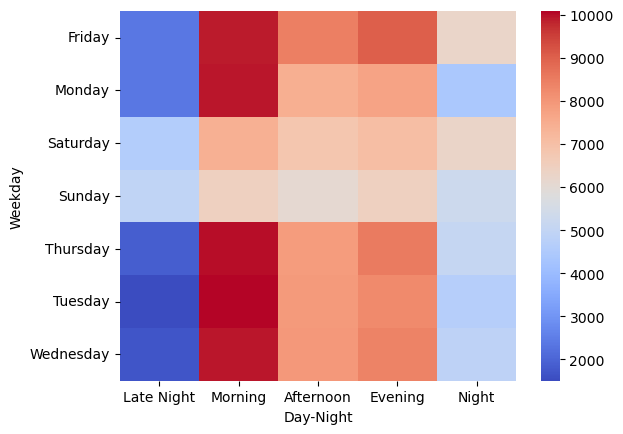

In [112]:
sns.heatmap(heatmap_data1, cmap="coolwarm")

<Axes: xlabel='Day-Night', ylabel='Month'>

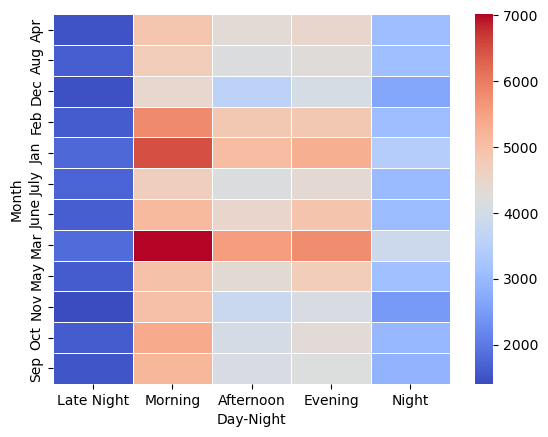

In [114]:
sns.heatmap(heatmap_data2,cmap="coolwarm", linewidths=0.5)

In [116]:
heatmap_data3=df.pivot_table(index="Year", columns="Day-Night", aggfunc="size")
heatmap_data3

C:\Users\ricmm\AppData\Local\Temp\ipykernel_13540\124913795.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data3=df.pivot_table(index="Year", columns="Day-Night", aggfunc="size")


Day-Night,Late Night,Morning,Afternoon,Evening,Night
Year,,,,,
2021,8498,28427,24981,26083,17453
2022,8838,28307,22454,23902,15645
2023,1968,6939,5085,5383,3700


<Axes: xlabel='Day-Night', ylabel='Year'>

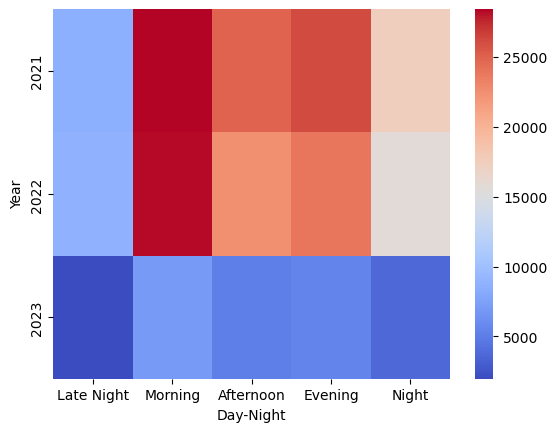

In [118]:
sns.heatmap(heatmap_data3, cmap="coolwarm")

In [120]:
pd.set_option("display.max_columns", None)

In [122]:
df.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,Month,Year,Hour,Day-Night,Weekday
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,Unspecified,40.83398,-73.82635,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0,Jan,2021,20,Night,Friday
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,Unspecified,40.6873,-73.973656,Multiple/Uncertain Factor,Passenger Vehicle,0.0,0,0,0,0,0,0,0,Jan,2021,5,Morning,Friday
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,Unspecified,N/A,N/A,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0,Jan,2021,6,Morning,Friday
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.8827,-73.89273,Multiple/Uncertain Factor,Not Reported,0.0,0,0,0,0,0,0,0,Jan,2021,19,Evening,Friday
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.97864,Multiple/Uncertain Factor,Passenger Vehicle,0.0,0,0,0,0,0,0,0,Jan,2021,7,Morning,Friday


In [124]:
df["Vehicle Type"].value_counts()

Vehicle Type
Passenger Vehicle     201842
Transport               6642
Taxi                    6015
Bicycle                 5533
Bus                     4197
Not Reported            3148
Scooter                 2137
Motorcycle              2009
Emergency Services      1823
Delivery Vehicle        1695
Other                   1321
Construction             894
Utility Vehicle          856
Fire Services            196
Limousine                 97
Open Passenger            16
Name: count, dtype: int64

In [126]:
df["Vehicle Type"].replace("Other (Open Passenger)", "Open Passenger", inplace=True)
df["Vehicle Type"].replace("Unknown","Not Reported", inplace=True)

C:\Users\ricmm\AppData\Local\Temp\ipykernel_13540\2844305666.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Vehicle Type"].replace("Other (Open Passenger)", "Open Passenger", inplace=True)
C:\Users\ricmm\AppData\Local\Temp\ipykernel_13540\2844305666.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

<Axes: xlabel='Borough', ylabel='count'>

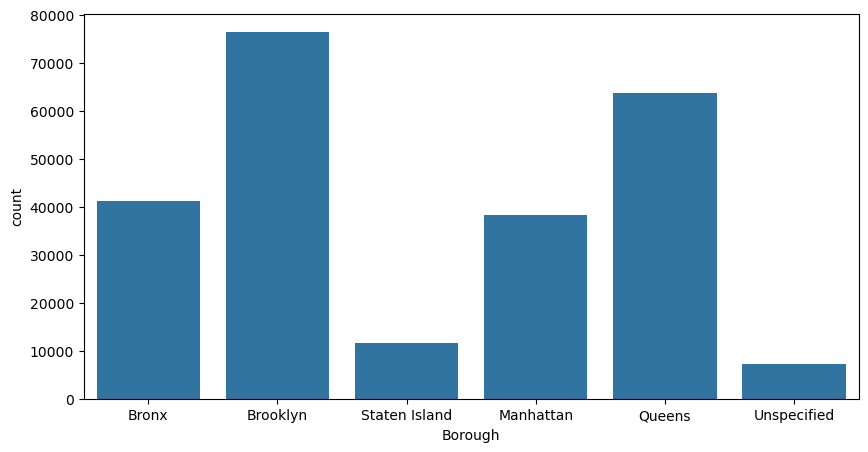

In [128]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Borough"])


In [129]:
heatmap_data_loctime=df.pivot_table(index="Day-Night",columns="Borough", aggfunc="size")
heatmap_data_locday=df.pivot_table(index="Weekday",columns="Borough", aggfunc="size")
heatmap_data_locmonth=df.pivot_table(index="Borough",columns="Month", aggfunc="size")

C:\Users\ricmm\AppData\Local\Temp\ipykernel_13540\2516338797.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_loctime=df.pivot_table(index="Day-Night",columns="Borough", aggfunc="size")


<Axes: xlabel='Borough', ylabel='Day-Night'>

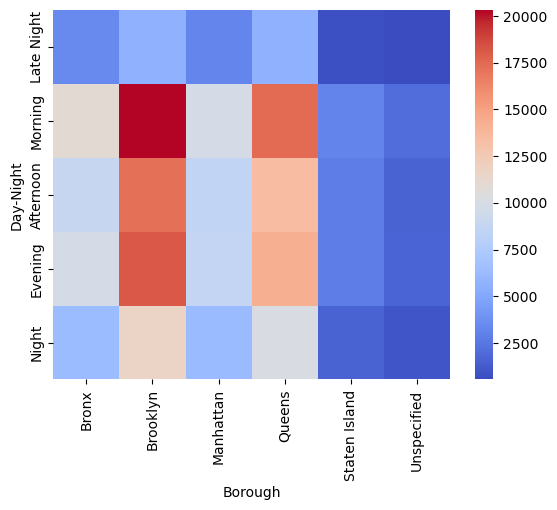

In [132]:
sns.heatmap(heatmap_data_loctime, cmap="coolwarm")

<Axes: xlabel='Borough', ylabel='Weekday'>

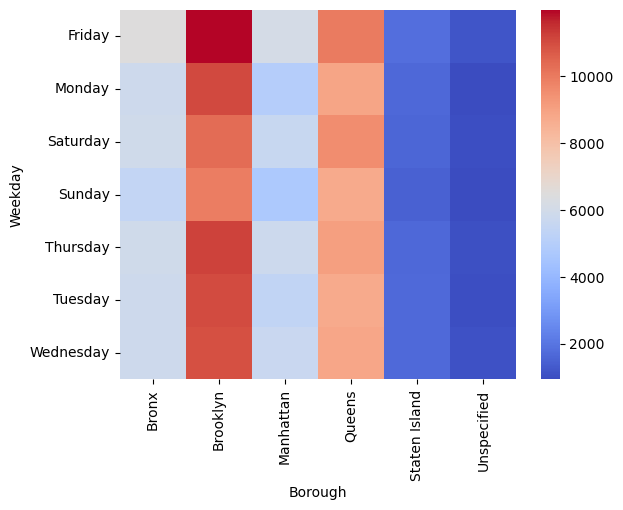

In [134]:
sns.heatmap(heatmap_data_locday, cmap="coolwarm")

<Axes: xlabel='Month', ylabel='Borough'>

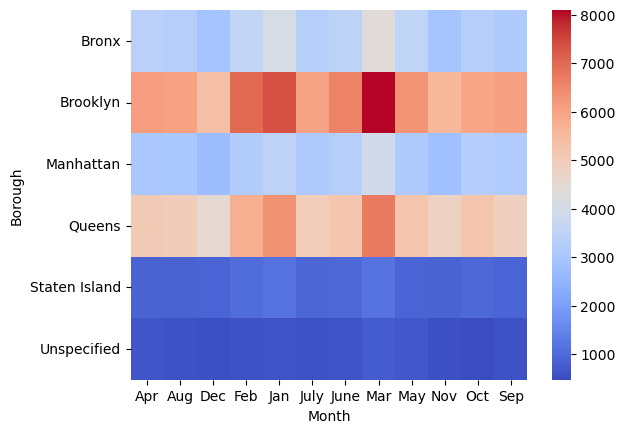

In [136]:
sns.heatmap(heatmap_data_locmonth, cmap="coolwarm")

In [138]:
df.head()

,Collision ID,Date,Time,Borough,Street Name,Cross Street,Latitude,Longitude,Contributing Factor,Vehicle Type,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,Month,Year,Hour,Day-Night,Weekday
0,4491746,2021-01-01,20:00:00,Bronx,Bruckner Expressway,Unspecified,40.83398,-73.82635,Pavement Slippery,Passenger Vehicle,0.0,0,0,0,0,0,0,0,Jan,2021,20,Night,Friday
1,4441905,2021-01-01,05:28:00,Brooklyn,Lafayette Avenue,Unspecified,40.6873,-73.973656,Multiple/Uncertain Factor,Passenger Vehicle,0.0,0,0,0,0,0,0,0,Jan,2021,5,Morning,Friday
2,4382769,2021-01-01,06:00:00,Staten Island,West Shore Expressway,Unspecified,N/A,N/A,Fell Asleep,Passenger Vehicle,0.0,0,0,0,0,0,0,0,Jan,2021,6,Morning,Friday
3,4380949,2021-01-01,19:30:00,Bronx,Sedgwick Avenue,Vancortlandt Avenue West,40.8827,-73.89273,Multiple/Uncertain Factor,Not Reported,0.0,0,0,0,0,0,0,0,Jan,2021,19,Evening,Friday
4,4380940,2021-01-01,07:40:00,Brooklyn,Cortelyou Road,Mc Donald Avenue,40.63791,-73.97864,Multiple/Uncertain Factor,Passenger Vehicle,0.0,0,0,0,0,0,0,0,Jan,2021,7,Morning,Friday


In [140]:
count_vehicle_type=df["Vehicle Type"].value_counts()

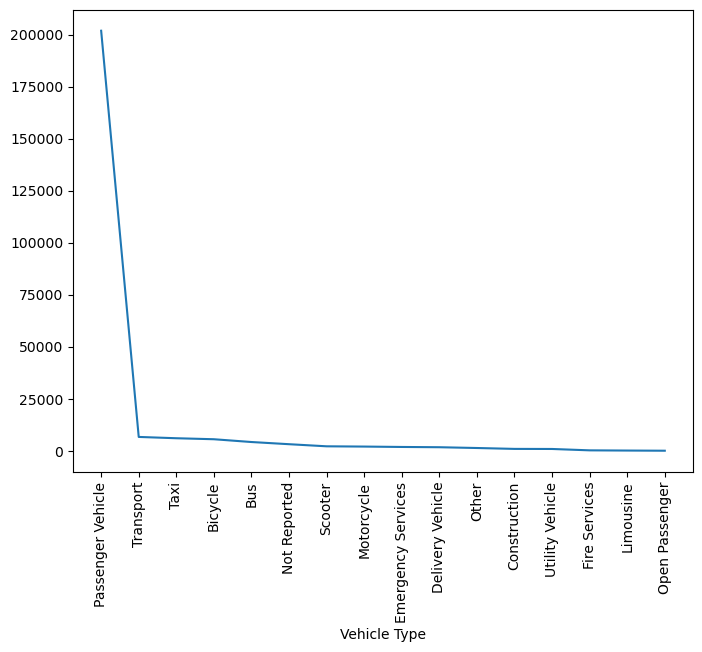

In [142]:
plt.figure(figsize=(8,6))

sns.lineplot(x=count_vehicle_type.index, y=count_vehicle_type.values)
plt.xticks(rotation=90)

plt.show()

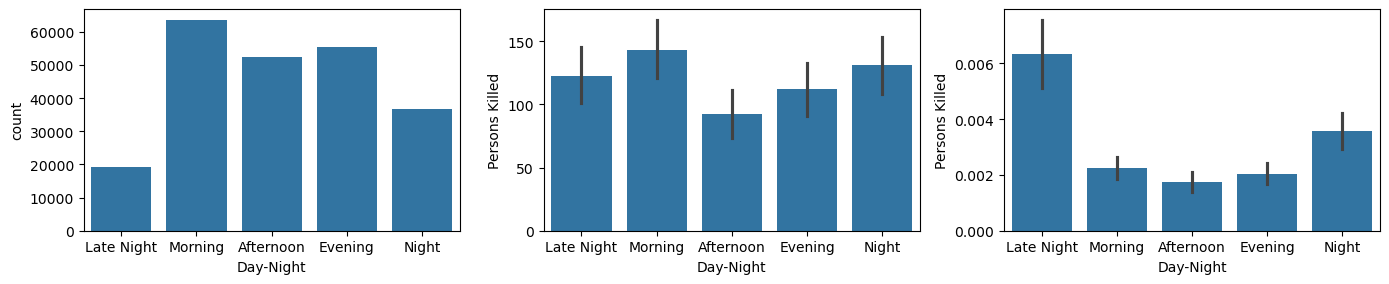

In [162]:
plt.figure(figsize=(14,3))

plt.subplot(1,3,1)
sns.countplot(x=df["Day-Night"])

plt.subplot(1,3,2)
sns.barplot(x=df["Day-Night"], y=df["Persons Killed"], estimator=np.sum)

plt.subplot(1,3,3)
sns.barplot(x=df["Day-Night"], y=df["Persons Killed"])

plt.tight_layout()

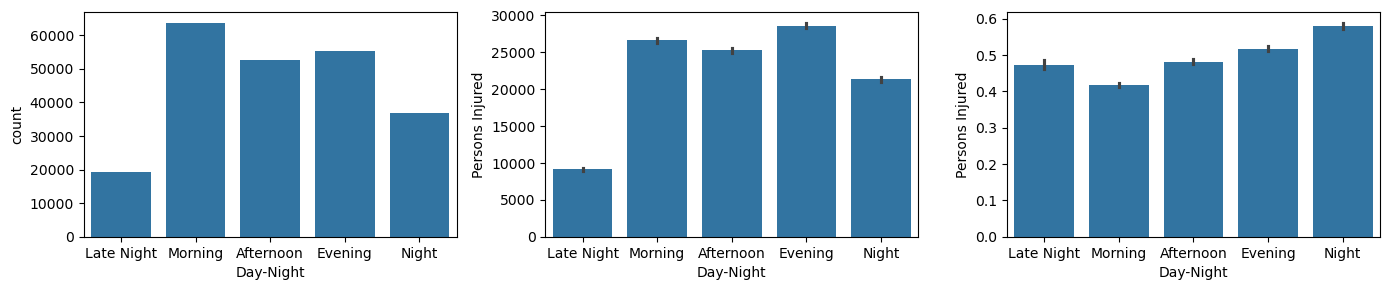

In [164]:
plt.figure(figsize=(14,3))

plt.subplot(1,3,1)
sns.countplot(x=df["Day-Night"])

plt.subplot(1,3,2)
sns.barplot(x=df["Day-Night"], y=df["Persons Injured"], estimator=np.sum)

plt.subplot(1,3,3)
sns.barplot(x=df["Day-Night"], y=df["Persons Injured"])

plt.tight_layout()

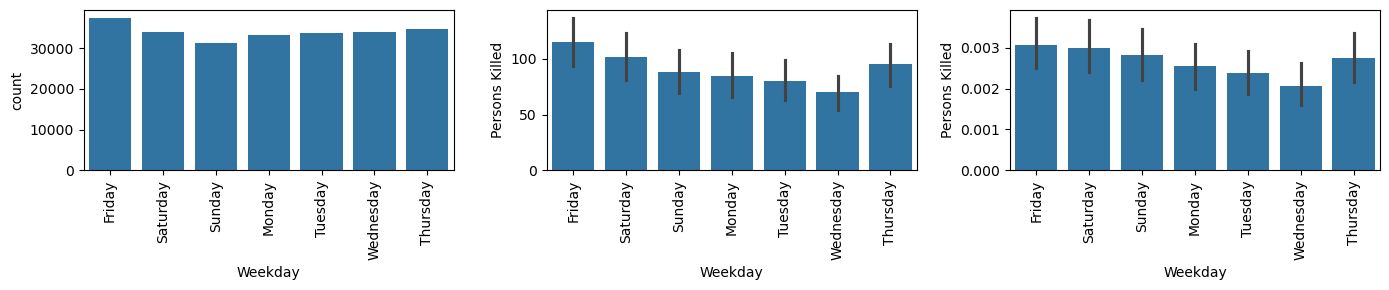

In [177]:
plt.figure(figsize=(14,3))

plt.subplot(1,3,1)
sns.countplot(x=df["Weekday"])
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.barplot(x=df["Weekday"], y=df["Persons Killed"], estimator=np.sum)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.barplot(x=df["Weekday"], y=df["Persons Killed"])
plt.xticks(rotation=90)

plt.tight_layout()

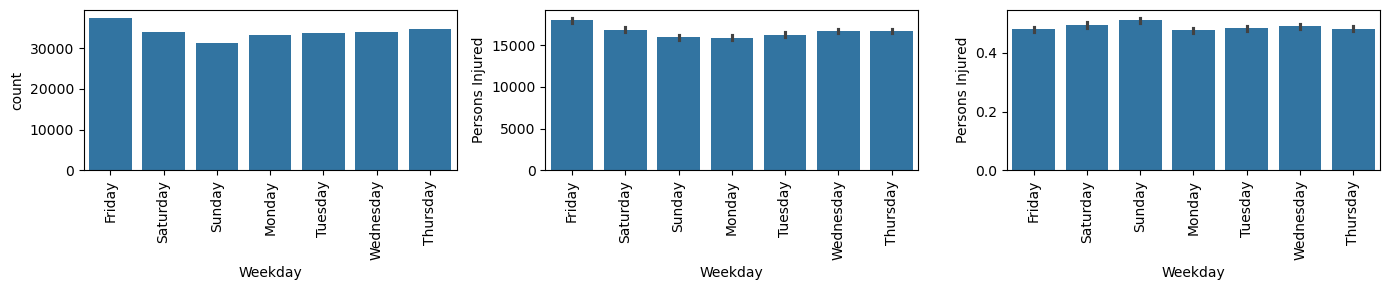

In [179]:
plt.figure(figsize=(14,3))

plt.subplot(1,3,1)
sns.countplot(x=df["Weekday"])
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.barplot(x=df["Weekday"], y=df["Persons Injured"], estimator=np.sum)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.barplot(x=df["Weekday"], y=df["Persons Injured"])
plt.xticks(rotation=90)

plt.tight_layout()

In [173]:
df.to_csv("NYC_Collisions_cleaned.csv", index=False)